# Logistic Regression

# Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [16]:
data = pd.read_csv('diamonds.prn')
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Data types

In [17]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

# Data Preprocessing

In [18]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered = True)
data['cut'] = data['cut'].astype(cat_type)

In [20]:
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Checking the data type

In [21]:
data['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True, categories_dtype=object)

Calculating the volume

In [22]:
data['volume'] = data['x']*data['y']*data['z']
data.drop(['x','y','z'], axis = 1, inplace = True)

Visualizing the distribution

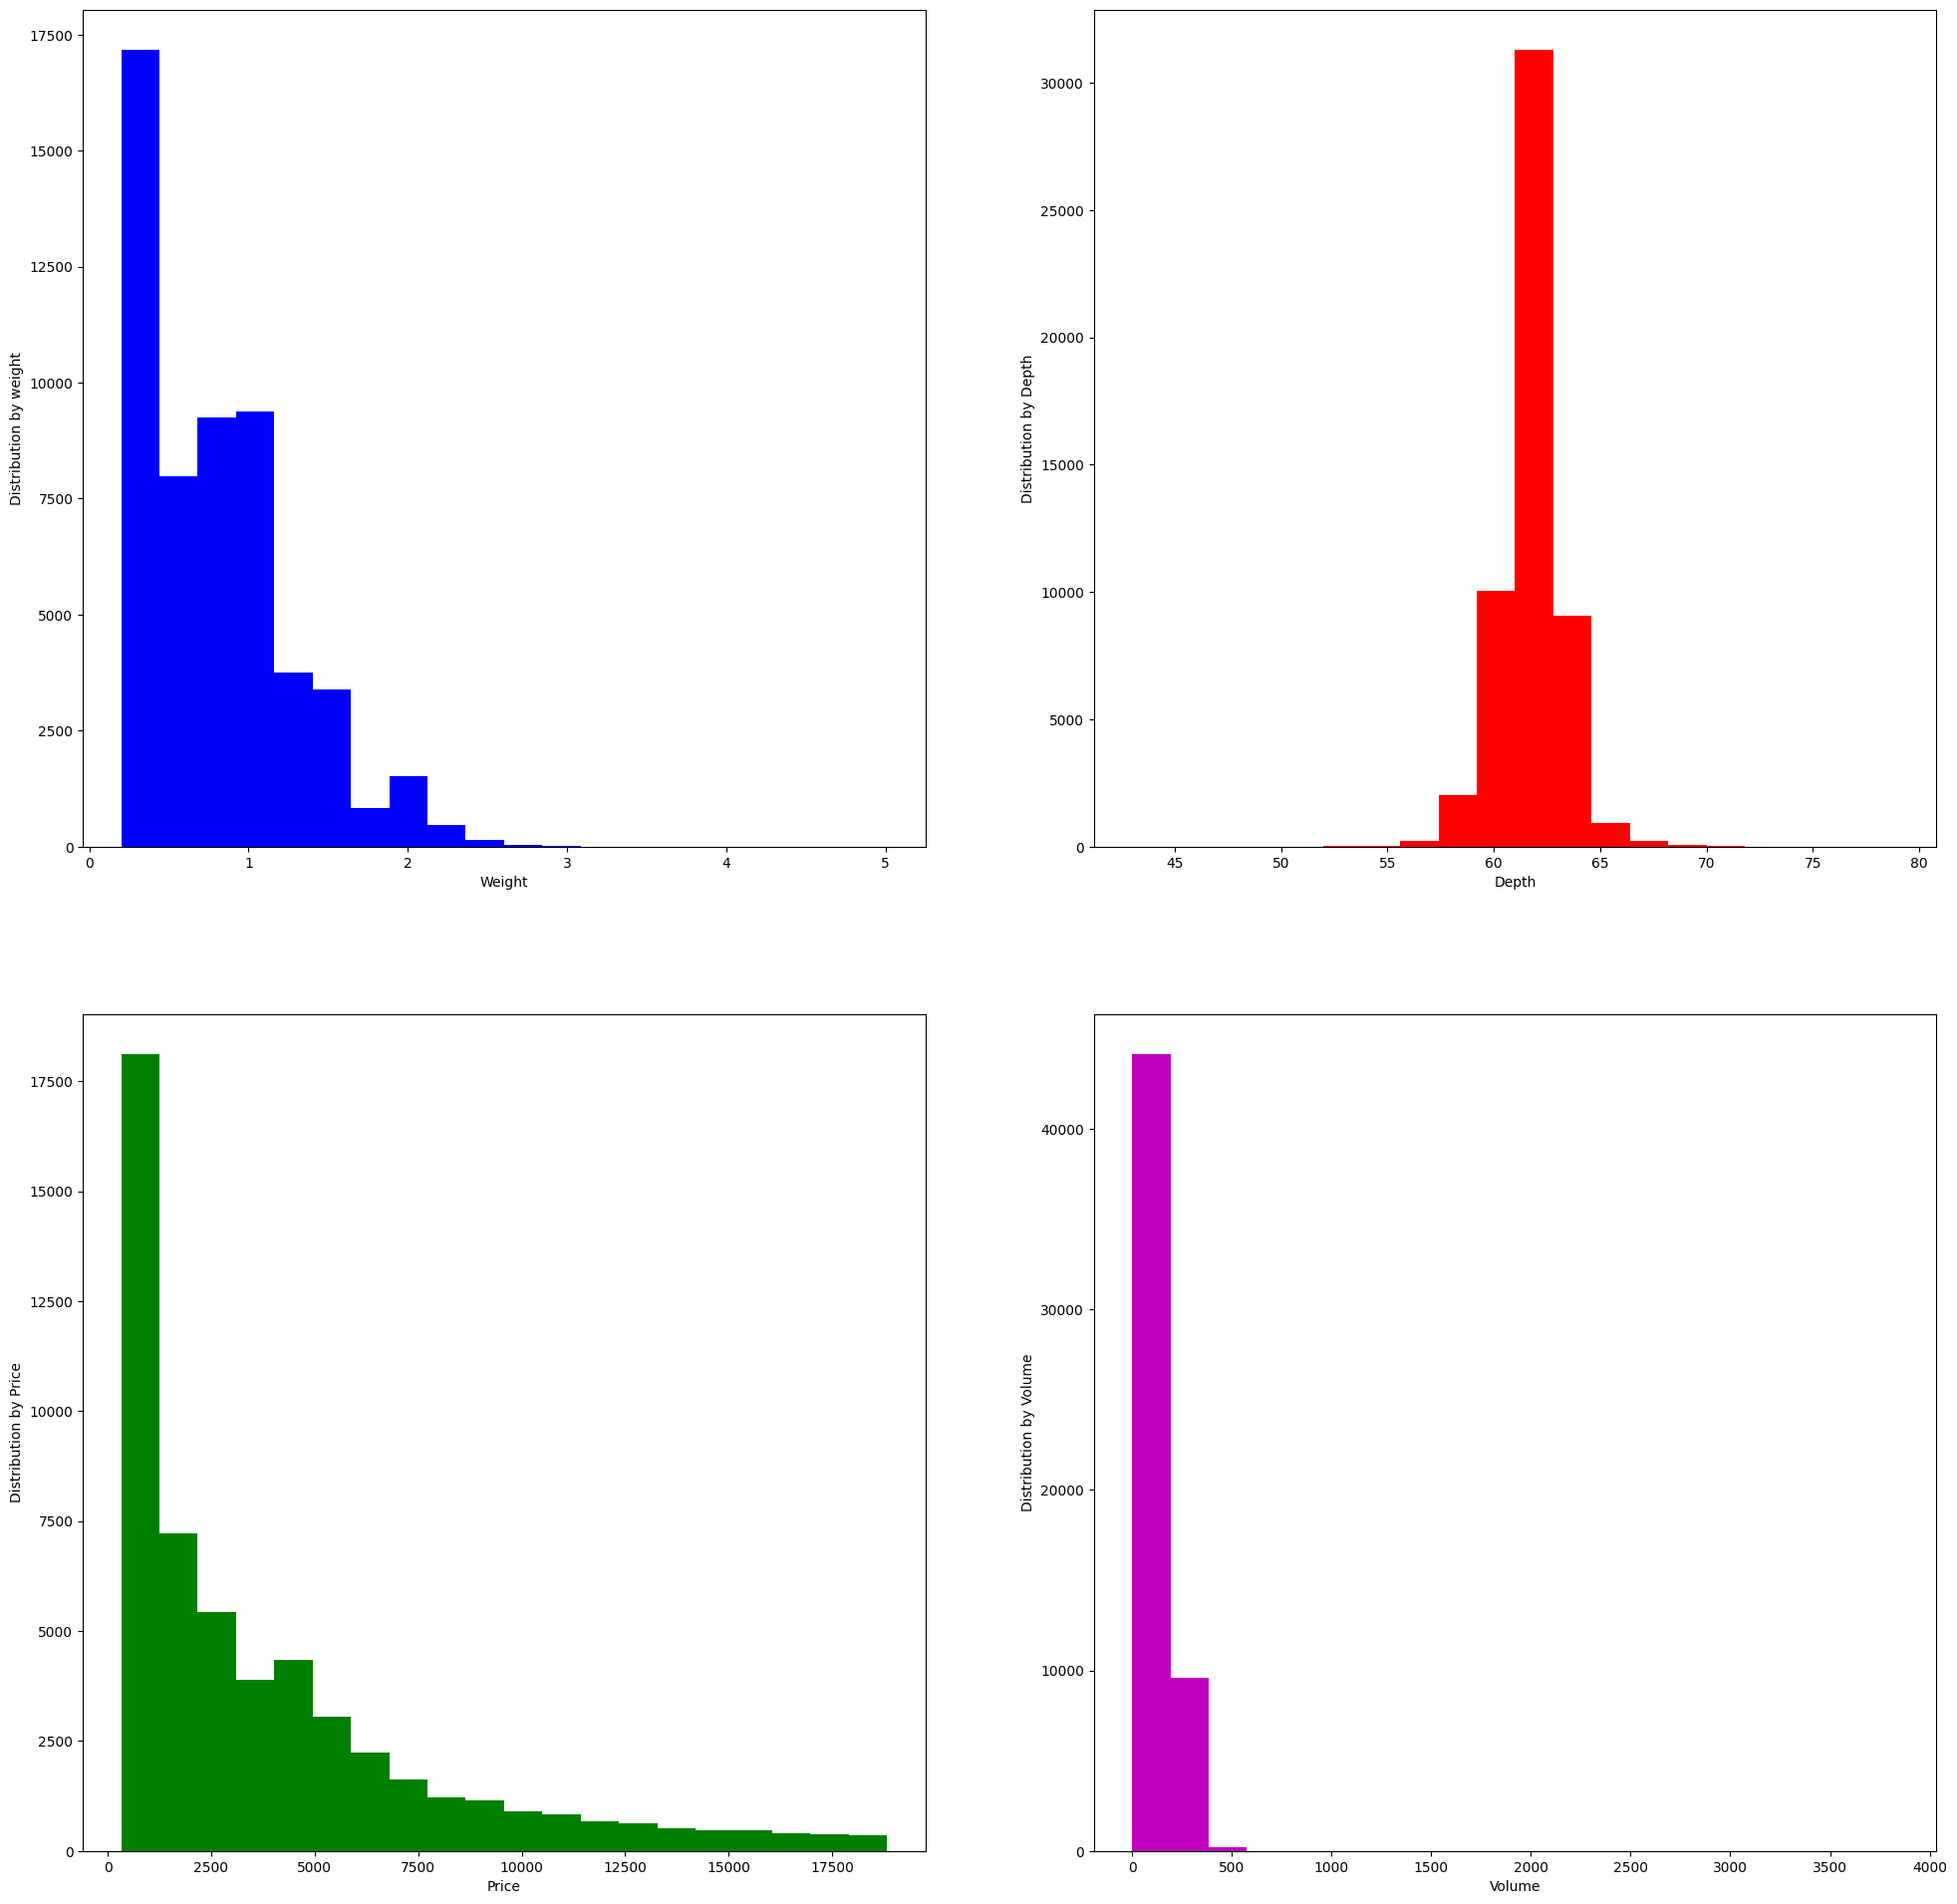

In [26]:
plt.figure(figsize = [24, 24])

plt.subplot(221)
plt.hist(data['carat'], bins = 20, color='b')
plt.xlabel('Weight')
plt.ylabel('Distribution by weight')

plt.subplot(222)
plt.hist(data['depth'], bins = 20, color='r')
plt.xlabel('Depth')
plt.ylabel('Distribution by Depth')

plt.subplot(223)
plt.hist(data['price'], bins = 20, color='g')
plt.xlabel('Price')
plt.ylabel('Distribution by Price')

plt.subplot(224)
plt.hist(data['volume'], bins = 20, color='m')
plt.xlabel('Volume')
plt.ylabel('Distribution by Volume')
plt.show()

# Probit Model

In [28]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_prob = OrderedModel(data['cut'], data[['volume', 'price', 'carat']],
                        distr='probit')

In [30]:
res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.369122
         Iterations: 29
         Function evaluations: 35
         Gradient evaluations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73850.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Sat, 16 Mar 2024                                         
Time:                        16:21:50                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           3                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0060      0.001     10.108      0.000       0.005       0.007
price              3.511e-05   3.01e-06     11.658      0.000    2.92e-05     4.1e-05
carat                -1.1049      0.097    -11.353      0.000      -1.296      -0.914
Fair/Good            -1.8589      0.016   -119.403      0.000      -1.889      -1.828
Good/Ideal           -0.3292      0.014    -24.056      0.000      -0.356      -0.302
Ideal/Very Good       0.2053      0.006     35.080      0.000       0.194       0.217
Very Good/Premium    -0.4986      0.008    -60.605      0.000      -0.515      -0.483
=====================================================================================
"""

Make the Prediction from the model

In [31]:
predicted = res_log.model.predict(res_log.params, exog = data[['volume','price','carat']])
predicted

array([[0.03245793, 0.09755853, 0.41044907, 0.22035949, 0.23917499],
       [0.0324667 , 0.09757532, 0.41047146, 0.22034902, 0.23913749],
       [0.03251004, 0.0976582 , 0.4105819 , 0.22029734, 0.23895252],
       ...,
       [0.03072479, 0.09419837, 0.4058435 , 0.22241922, 0.24681412],
       [0.03203741, 0.09675142, 0.40936546, 0.22086059, 0.24098511],
       [0.03033943, 0.09343888, 0.4047677 , 0.22287484, 0.24857915]])